# Interactive Weathergami

![Interactive weathergami plot for Chicago, IL](../images/interactive-weathergami.png)

## Motivation


Scorigami is an interesting concept. It's an event in sports where a final score has never happened in its history. For example, in the <a href='https://nflscorigami.com/' target="_blank">National Football League</a>, a 20-17 score has happened over 285 times, but a 70-20 score has only happened once. When the Miami Dolphins beat the Denver Broncos 70-20 on September 24th, 2023, that was considered a scorigami!

Well, inspired by this, Jonathan Kahl wrote an <a href='https://journals.ametsoc.org/view/journals/bams/104/10/BAMS-D-23-0035.1.xml' target="_blank">article</a> in the Bulletin of the American Meteorological Society describing the concept of 'WeatherGami', utilizing the days Maximum and Minimum temperature at a given area. Since <a href='https://www.ncei.noaa.gov' target="_blank">NOAA NCEI</a> holds all of the worlds weather data, it makes sense to see how WeatherGami works on their station database. This code reproduces the results!

Jared Rennie then wrote [a notebook](https://github.com/jjrennie/weathergami) reproducing similar figures in a notebook, and I modified that notebook to add in some additional plotting tools to make plots interactive + easily configure a dashboard! In this example, I am interested in how common a combination of:
- high temperature of 46 degrees Fahrenheit
- low temperature of 33 degrees Fahrenheit
is at Chicago O'Hare airport.


## What You Need

First off, the entire codebase works in Python 3. In addition to base Python, you will need the following packages installed: 
- requests (to access the api)
- pandas (to slice annd dice the data)
- matplotlib (to plot!)
- cmweather (for neat weather colorbars)
- holoviews + hvplot (for interactive plotting)
    
The "easiest" way is to install these is by installing <a href='https://www.anaconda.com' target="_blank">anaconda</a>, and then applying <a href='https://conda-forge.org/' target="_blank">conda-forge</a>. Afterward, then you can install the above packages.

```
conda install -c conda-forge requests pandas matplotlib cmweather holoviews hvplot
```

## Importing Packages
Assuming you did the above, it should (in theory) import everything no problem:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
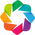

In [3]:
# Import packages
import json,requests,sys
import pandas as pd
import hvplot.pandas
import numpy as np
import cmweather
import holoviews as hv
import sys
import panel as pn
hv.extension('bokeh')

## Accessing the Data

### Set Your Desired Location and Test Temperatures
To access the data, we will be utilizing the <a href='https://www.rcc-acis.org/docs_webservices.html' target='blank'>Applied Climate Information System (ACIS) API</a>, which is a quick and easy way to access our station data without downloading data locally (streaming!). Now we need to know what station to get data for. The ACIS API accepts all sorts of IDs, including:

- FAA (i.e. AVL)
- ghcn (i.e. USW00003812)
- ThreadEx (i.e. AVLthr)

If you're not sure, you can refer to the API documentation above. We also need a maximum/minimum combo for us to check against the database. And finally we need to give you credit for the image that is created at the end. 

 **Change the arguments below to your liking**

In [4]:
# Insert Arguments Here
stationID = 'ORD'
inTmax= 46.
inTmin= 33.
author='Max Grover'

The rest of the code should work without making any changes to it, but if you're interested, keep on reading to see how the sausage is made.

This next block of code will attempt to access the data we want from the ACIS API. The API is publicly available, but sometimes there are hiccups when getting the data. We tried to account for this with a try/exept in this code block and it will let you know if it fails after 3 seconds. If this happens, wait a minute, then try again.

In [5]:
def get_data(stationID, inTmax=inTmax, inTmin=inTmin):

    # Build JSON to access ACIS API (from https://www.rcc-acis.org/docs_webservices.html)
    acis_url = 'http://data.rcc-acis.org/StnData'
    payload = {
    "output": "json",
    "params": {"elems":[{"name":"maxt","interval":"dly","prec":1},{"name":"mint","interval":"dly","prec":1}],
               "sid":stationID,
               "sdate":"por",
               "edate":"por"
              } 
    }

    # Make Request
    try:
        r = requests.post(acis_url, json=payload,timeout=3)
        acisData = r.json()
        print("SUCCESS!")
    except Exception as e:
        sys.exit('\nSomething Went Wrong With Accessing API after 3 seconds, Try Again')
    
    # Get Station Info
    stationName=acisData['meta']['name'].title()
    stationState=acisData['meta']['state']

    # Convert data into Pandas DataFrame
    df = pd.DataFrame(acisData['data'],
                      columns=['Date','Tmax','Tmin'],
                     )

    # Convert the datatypes for Tmax/Tmin to be floats
    df["Tmax"] = df.Tmax.astype(float)
    df["Tmin"] = df.Tmin.astype(float)

    # Make sure data 
    return df, stationName, stationState

If it says "SUCCESS!" then congrats you got the data!

### Let's check the data!
How does it look? Well the data comes back as a JSON, which can be a little confusing to look at, so let's extract the information we need, and reorganize it a bit.

First, the JSON has a 'meta' key and a 'data' key. The 'meta' key gets us info like station name, latitude, longitude, etc. And 'data' is the actual data we requested. So let's get some station info, and convert the data into a pandas dataframe, which makes it easier to see. 

In [6]:
df, stationName, stationState = get_data(stationID)
print("\nSuccessfully Orgainzed Data for: ",stationName,',',stationState)
print(df)

SUCCESS!

Successfully Orgainzed Data for:  Chicago Ohare Intl Ap , IL
             Date  Tmax  Tmin
0      1958-11-01  54.0  40.0
1      1958-11-02  53.0  37.0
2      1958-11-03  60.0  34.0
3      1958-11-04  68.0  41.0
4      1958-11-05  58.0  38.0
...           ...   ...   ...
23757  2023-11-17  60.0  34.0
23758  2023-11-18  53.0  31.0
23759  2023-11-19  54.0  35.0
23760  2023-11-20  50.0  42.0
23761  2023-11-21  44.0  36.0

[23762 rows x 3 columns]


Sometimes people want to know what the station's period of record is, so let's get that info. 

In [7]:
stationStart=df.iloc[[0]]['Date'].values[0][0:4]
stationEnd=df.iloc[[-1]]['Date'].values[0][0:4]
print("Period of Record: ",stationStart,"-",stationEnd)

Period of Record:  1958 - 2023


### Cool, but is it a WeatherGami?
Let's find out! We can use some pandas calls to see if our max/min input has happened in the record before. This code block will tell you if it's a WeatherGami or not. If not, it will tell you the other times it has happened in the record. Here, we define a WeatherGami as either happening once before, or not at all.

In [8]:
# Now Find if the Tmax/Tmin combo has happened in the record before (ie WeatherGami).
wgTest=df.loc[(df['Tmax'] == inTmax) & (df['Tmin']==inTmin)].sort_values('Date', ascending=False)

if len(wgTest) == 0:
    wgResult="It's a WeatherGami!"
    print(inTmax,'/',inTmin,': ',wgResult)
    print("It has never happened before!")
elif len(wgTest) == 1:
    wgResult="It's a WeatherGami!"
    print(inTmax,'/',inTmin,': ',wgResult)
    print("It has happened ",len(wgTest)," time before")
    print(wgTest)
else:
    wgResult="It's NOT a WeatherGami!"
    print(inTmax,'/',inTmin,': ',wgResult)
    print("It has happened ",len(wgTest)," times before")
    print(wgTest)

46.0 / 33.0 :  It's NOT a WeatherGami!
It has happened  16  times before
             Date  Tmax  Tmin
22696  2020-12-21  46.0  33.0
22668  2020-11-23  46.0  33.0
21688  2018-03-19  46.0  33.0
21547  2017-10-29  46.0  33.0
16099  2002-11-29  46.0  33.0
15845  2002-03-20  46.0  33.0
15752  2001-12-17  46.0  33.0
14998  1999-11-24  46.0  33.0
14707  1999-02-06  46.0  33.0
12817  1993-12-04  46.0  33.0
11115  1989-04-07  46.0  33.0
7427   1979-03-03  46.0  33.0
6956   1977-11-17  46.0  33.0
5995   1975-04-01  46.0  33.0
5634   1974-04-05  46.0  33.0
4800   1971-12-23  46.0  33.0


The other thing we might want to know is the frequency, or percentage of time a max/min combo occurrs. The followig code block does this for all combinations, and prints out the most common. We also need to weed out missing data at this point, which is recogized as 'M' by the API

In [9]:
frequency_counts = df.groupby(['Tmax', 'Tmin']).size().reset_index(name='Frequency')
frequency_counts['Percentage'] = (frequency_counts['Frequency'] / len(df)) * 100
frequency_counts=frequency_counts.loc[(frequency_counts['Tmax']!='M') & (frequency_counts['Tmin']!='M')].sort_values('Percentage', ascending=True)
frequency_counts

,Tmax,Tmin,Frequency,Percentage
0,-11.0,-25.0,1,0.004208
1104,46.0,44.0,1,0.004208
1106,47.0,14.0,1,0.004208
1107,47.0,15.0,1,0.004208
1111,47.0,20.0,1,0.004208
...,...,...,...,...
2252,80.0,62.0,36,0.151502
2417,85.0,65.0,37,0.155711
2287,81.0,63.0,37,0.155711
2415,85.0,63.0,37,0.155711


In [10]:
# Get Frequency and Percentage Info needed for Plotting
frequency_counts = df.groupby(['Tmax', 'Tmin']).size().reset_index(name='Frequency')
frequency_counts['Percentage'] = (frequency_counts['Frequency'] / len(df)) * 100

# Remove Missing Data
frequency_counts=frequency_counts.loc[(frequency_counts['Tmax']!='M') & (frequency_counts['Tmin']!='M')].sort_values('Percentage', ascending=True)

# Get Frequency of input tmax/tmin and most frequent
currFreq=frequency_counts.loc[(frequency_counts['Tmax'] == inTmax) & (frequency_counts['Tmin']==inTmin)]
if len(currFreq)==0:
    currFreq=str(inTmax)+'/'+str(inTmin)+': '+wgResult+' (It has never happened before!)'
elif currFreq['Frequency'].values[0]==1:
    currFreq=str(inTmax)+'/'+str(inTmin)+': '+wgResult+' ('+str(currFreq.iloc[-1]['Frequency'])+' Occurrence)'
else:
    currFreq=str(inTmax)+'/'+str(inTmin)+': '+wgResult+' ('+str(currFreq.iloc[-1]['Frequency'])+' Occurrences)'
mostFreq=str(frequency_counts.iloc[-1]['Tmax'])+'/'+str(frequency_counts.iloc[-1]['Tmin'])+' ('+str(frequency_counts.iloc[-1]['Frequency'])+' Occurrences)'

print('Most Frequent: ',mostFreq)

Most Frequent:  86.0/68.0 (38.0 Occurrences)


Now for the fun part...

### Plotting the data!

This block of code will take the max/min combos and plot it, and color by frequency. A red dot will also plot with the max/min combo given as an input.

In [11]:
# Determine maximum/minimum ranges
ymin=int(5 * round(float((min(frequency_counts['Tmin'].values) - 10))/5))
ymax=int(5 * round(float((max(frequency_counts['Tmin'].values) + 10))/5))
xmin=int(5 * round(float((min(frequency_counts['Tmax'].values) - 10))/5))
xmax=int(5 * round(float((max(frequency_counts['Tmax']) + 10))/5))

# Create a heatmap with adjustable parameters
heatmap = frequency_counts.hvplot.heatmap('Tmax',
                                          'Tmin',
                                          C='Percentage',
                                          height=300,
                                          width=400,
                                          reduce_function=np.mean,
                                          ylabel=r'Minimum Temperature (°F)',
                                          xlabel=r'Maximum Temperature (°F)',
                                          xlim=(xmin, xmax),
                                          ylim=(ymin, ymax),
                                          cmap='HomeyerRainbow',
                                          clabel='Frequency (%)',
                                          alpha=.6,
                                          title='WeatherGami For \n'+stationName+', '+stationState
                                         ).opts(show_grid=True)

# Add the red dot for the maximum/minimum
feature = hv.Points([(float(inTmax), float(inTmin))]).opts(color='red')

# Add different labels to the plot
attribution = hv.Text(xmax-30, ymin+10, f"Source: ACIS \n  Generated by {author} \n Inspired By Kahl (2023) \n and Jared Renee", fontsize=4)
status = hv.Text(xmin+40, ymax-30, currFreq+'\nMost Common: '+mostFreq+'\nPeriod of Record= '+str(stationStart)+'-'+str(stationEnd), fontsize=4)

# Combine the first part of the plot by *
final_plot = heatmap * attribution * status * feature

# Add a table for the "hits"
table_results = wgTest.hvplot.table(title=f'Weathergami "Hits" \n (High: {inTmax} °F, Low: {inTmin} °F)',
                                            columns='Date',
                                            sortable=True,
                                            selectable=True,
                                            fontsize=8,
                                            height=300,
                                            width=200)
    
(final_plot + table_results).cols(2)

:Layout
   .Overlay.I :Overlay
      .HeatMap.I :HeatMap   [Tmax,Tmin]   (Percentage)
      .Text.I    :Text   [x,y]
      .Text.II   :Text   [x,y]
      .Points.I  :Points   [x,y]
   .Table.I   :Table   [Date]

## Conclusions
This was a really fun blog post/notebook to put together! Weathergami plots can be interesting to create and visualize, and I hope this helps with getting started with the hvPlot stack with weather/climate data! In future iterations of this dashboard, I hope to add widgets to select the temperatures of interest, as well as a drop down menu for the various sites available.